# Clipping user-defined shapes

While data can be extracted from large files and selected later on for their desired geographical range, it is often more efficient to pre-clip the parent file, since queries may else take quite some time.

There are 3 basic ways to clip (=cut) a larger osm.pbf file to a smaller osm.pbf file: 

* specifying a bounding box (xmin, ymin, xmax, ymax)
* providing a shapely (multi)-polygon
* providing a .poly file representing a (multi-)polygon


**Important Note 1**:

To make this code work, a clipping tool must first be installed. Two options are compatible with the methods presented, `osmosis` and `osmconvert`.
Installation instructions can be found [here](https://wiki.openstreetmap.org/wiki/Osmosis/Installation) for osmosis, and [here](https://wiki.openstreetmap.org/wiki/Osmconvert) for osmconvert. 
Osmosis is a command-line tool that works well on Linux and Mac OS, osmconvert works equally for windows, Linux and Mac OS. If osmconvert is used, the osm-flex default configuration expects the executable to be placed in your osm folder (at the same level as osm-flex), unless specified differently in the config file.


**Important Note 2:**

The shapes to which the new file should be clipped must be fully contained in the larger file. The larger the parent file, the longer the clipping process.

**Important Note 3:**

`'osmconvert'` features optional parameters `--complete-ways`, `--complete-multipolygons` and `--complete-boundaries`. These are useful if objects which cross clipping borders should not be cut off. If you want this, the function `osm_flex.clip._build_osmconvert_cmd()` manually needs to be amended (comment out those options). Howerver, this will only run for parent files < 2 GB. Hence, clipping from e.g., the planet or the europe.osm.pbf files is not possible with these options. 

In [1]:
# Loading necessary data packages
import sys
sys.path.append('/Users/evelynm/osm-flex/src') # your path to osm-flex/src

import osm_flex.download as dl
import osm_flex.extract as ex
import osm_flex.config
import osm_flex.clip as cp

### Example 1: Clipping a province from a country file

The following example uses the `osmosis` kernel. If you installed `osmconvert` instead, just change the keyword arguement accordingly, and check that the executable is either placed in the path specified in `osm_flex.config.OSMCONVERT_PATH`, or that this variable is adjusted accordingly.

In [2]:
# Downloading a larger "parent" file to clip from: Honduras, from geofabrik.de 
# --> saved to OSM_DATA_DIR/honduras-latest.osm.pbf
dl.get_country_geofabrik('HND')

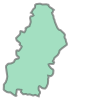

In [3]:
# Obtain a region polygon (Francisco Morazan) and clip the country file to it:
admin_1_hnd = cp.get_admin1_shapes('HND')
francisco_morazan_shp = list(admin_1_hnd.values())[-1]
francisco_morazan_shp

In [5]:
cp.clip_from_shapes([francisco_morazan_shp], 
                    osmpbf_output=osm_flex.config.OSM_DATA_DIR.joinpath('francisco_morazan.osm.pbf'),
                    osmpbf_clip_from=osm_flex.config.OSM_DATA_DIR.joinpath('honduras-latest.osm.pbf'),
                    kernel='osmosis', overwrite=True)

### Example 2: Clipping a country from a region file

In [4]:
# Downloading a larger "parent" file to clip from: Europe, from geofabrik.de 
# --> saved to OSM_DATA_DIR/europe-latest.osm.pbf
dl.get_region_geofabrik('europe')

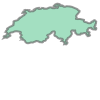

In [5]:
# Obtain a country polygon (Switzerland) and clip the europe file to it:
admin_che  = cp.get_country_shape('CHE')
admin_che

In [8]:
# Using `osmconvert` (this takes a while, ca. 5 - 10 mins)
cp.clip_from_shapes([admin_che], 
                    osmpbf_output=osm_flex.config.OSM_DATA_DIR.joinpath('che_clipped.osm.pbf'),
                    osmpbf_clip_from=osm_flex.config.OSM_DATA_DIR.joinpath('europe-latest.osm.pbf'),
                    kernel='osmconvert', overwrite=True)

In [9]:
# Using `osmosis` (this takes a while, ca. 10-20 mins)
cp.clip_from_shapes([admin_che], 
                    osmpbf_output=osm_flex.config.OSM_DATA_DIR.joinpath('che_clipped_osmosis.osm.pbf'),
                    osmpbf_clip_from=osm_flex.config.OSM_DATA_DIR.joinpath('europe-latest.osm.pbf'),
                    kernel='osmosis', overwrite=True)

Nov 02, 2023 2:44:20 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Osmosis Version 0.48.3
Nov 02, 2023 2:44:20 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Preparing pipeline.
Nov 02, 2023 2:44:20 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Launching pipeline execution.
Nov 02, 2023 2:44:20 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Pipeline executing, waiting for completion.
Nov 02, 2023 3:10:10 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Pipeline complete.
Nov 02, 2023 3:10:10 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Total execution time: 1550579 milliseconds.


### Example 3: Clipping a bounding box from a file

In [5]:
# Clip from a bounding box (xmin, ymin, xmax, ymax)
francisco_morazan_bbox = francisco_morazan_shp.bounds
cp.clip_from_bbox(francisco_morazan_bbox, 
                  osmpbf_output=osm_flex.config.OSM_DATA_DIR.joinpath('francisco_morazan_bbox.osm.pbf'),
                  osmpbf_clip_from=osm_flex.config.OSM_DATA_DIR.joinpath('honduras-latest.osm.pbf'),
                  kernel='osmosis',overwrite=True)

Apr 21, 2023 2:58:31 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Osmosis Version 0.48.3
Apr 21, 2023 2:58:31 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Preparing pipeline.
Apr 21, 2023 2:58:31 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Launching pipeline execution.
Apr 21, 2023 2:58:31 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Pipeline executing, waiting for completion.
Apr 21, 2023 2:58:35 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Pipeline complete.
Apr 21, 2023 2:58:35 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Total execution time: 3895 milliseconds.


### Example 4: Clipping a file using another .poly file

In [12]:
# Clip from a .poly file
# for demonstrative purposes, create a .poly file from the shapely polygon used earlier:
cp._shapely2poly([francisco_morazan_shp], osm_flex.config.POLY_DIR/'francisco_morazan.poly')

cp.clip_from_poly(osm_flex.config.POLY_DIR/'francisco_morazan.poly', 
                  osmpbf_output=osm_flex.config.OSM_DATA_DIR.joinpath('francisco_morazan_polyclip.osm.pbf'),
                  osmpbf_clip_from=osm_flex.config.OSM_DATA_DIR.joinpath('honduras-latest.osm.pbf'),
                  overwrite=True)


Apr 21, 2023 3:05:29 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Osmosis Version 0.48.3
Apr 21, 2023 3:05:30 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Preparing pipeline.
Apr 21, 2023 3:05:30 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Launching pipeline execution.
Apr 21, 2023 3:05:30 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Pipeline executing, waiting for completion.
Apr 21, 2023 3:05:34 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Pipeline complete.
Apr 21, 2023 3:05:34 PM org.openstreetmap.osmosis.core.Osmosis run
INFO: Total execution time: 4490 milliseconds.


Further workflow: Extraction etc. is analogous to the main tutorial (0_basic_usage).